In [96]:
# import necessary modules for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
%matplotlib inline

In [97]:
# import sklearns modules for Prediction
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [98]:
#import dataset
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df = pd.read_csv(file_name)

<img src="pic1.png" alt="Definition of columns" width = 600rpm>

# Data Wrangling

In [99]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [101]:
df.nunique()

Unnamed: 0       21613
id               21436
date               372
price             4028
bedrooms            12
bathrooms           29
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

<code>Identify & Handle Missing Values<code>

In [102]:
df.drop(df.iloc[:,:1], axis=1, inplace=True)

In [103]:
df.drop('id', axis=1, inplace=True)

In [104]:
df.isna().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

In [105]:
# deal with missing values
# replace bedrooms and bathrooms missing values by mean
mean1 = df['bedrooms'].value_counts().mean(axis=0)
mean2 = df['bathrooms'].value_counts().mean(axis=0)
df['bedrooms'].replace(np.nan, mean1, inplace=True)
df['bathrooms'].replace(np.nan, mean2, inplace=True)

In [106]:
#correct  data format
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
#drop the date column
df.drop('date', axis=1, inplace=True)

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,4.453523,44.060306,1.0000,3.000,3.0000,4.000,1.800000e+03
bathrooms,21613.0,2.459425,15.993196,0.5000,1.750,2.2500,2.500,7.449310e+02
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


# Exploratory Data Analysis

In [108]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2.0,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


<code>Data Normalization

In [109]:
df['sqft_living'] = df['sqft_living']/df['sqft_living'].max()
df['sqft_lot'] = df['sqft_lot']/df['sqft_lot'].max()

In [110]:
df[['sqft_living','sqft_lot']].head()

,sqft_living,sqft_lot
0,0.087149,0.003421
1,0.189808,0.004385
2,0.056869,0.006056
3,0.144756,0.003028
4,0.124077,0.004893


<code>Data Binning

In [111]:
bins = np.linspace(df['grade'].min(), df['grade'].max(),4)
bins

array([ 1.,  5.,  9., 13.])

In [112]:
category = ['bad','medium','good']

In [113]:
df['grade_binned'] = pd.cut(df['grade'],bins, labels = category, include_lowest=True)
df['grade_binned'].value_counts()

medium    19702
good       1636
bad         275
Name: grade_binned, dtype: int64

<BarContainer object of 3 artists>

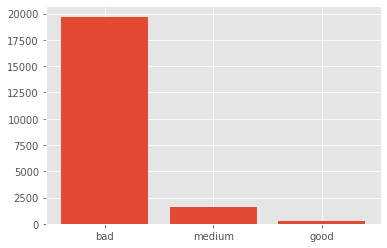

In [114]:
#visualizing 'condition_binned' column using barchart
pyplot.bar(category,df['grade_binned'].value_counts())

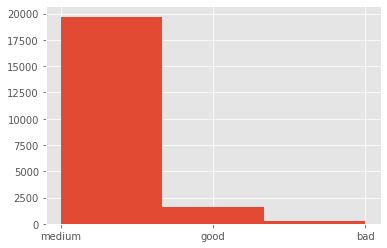

In [115]:
pyplot.hist(df['grade_binned'], bins=3)
plt.show()

<code>Indicator Variable(Dummy Variable)

In [116]:
# dummy_var = pd.get_dummies(df['yr_renovated'])
# dummy_var.drop(dummy_var.iloc[:,2:],axis=1,inplace=True)
# dummy_var[0].replace(0,1,inplace=True)
# dummy_var.rename(columns={0:'renovated', 1934:'Not-renovated'}, inplace=True)

# dummy_var

In [117]:
unique_floors = df['floors'].value_counts().to_frame()
unique_floors.columns = ['value_counts']
unique_floors.index.name = 'floors'
unique_floors

,value_counts
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [118]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
price,1.000000,-0.002232,0.019892,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,...,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447,-0.010081,0.003576
bedrooms,-0.002232,1.000000,0.612838,0.002218,0.006029,0.024966,-0.002281,0.004032,-0.020670,-0.012630,...,-0.009788,0.013997,-0.004766,-0.008388,-0.008814,0.013842,0.010073,0.012613,0.004538,-0.001010
bathrooms,0.019892,0.612838,1.000000,0.025944,0.004839,0.034314,0.001191,0.013701,-0.022890,0.007145,...,-0.000530,0.024511,-0.002085,-0.019903,-0.005076,0.035961,0.024630,0.007765,-0.000159,0.002270
sqft_living,0.702035,0.002218,0.025944,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,...,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286,0.011810,-0.029038
sqft_lot,0.089661,0.006029,0.004839,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,...,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557,-0.002369,0.005468
floors,0.256794,0.024966,0.034314,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,...,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269,0.014005,-0.022315
waterfront,0.266369,-0.002281,0.001191,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,...,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703,0.008132,-0.004165
view,0.397293,0.004032,0.013701,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,...,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575,-0.005638,0.001364
condition,0.036362,-0.020670,-0.022890,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,...,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,0.021978,-0.045589
grade,0.667434,-0.012630,0.007145,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,...,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248,0.008376,-0.030387


<code>Analyzing Individual Feature Patterns Using Visualization</code>


In [119]:
f_col = df.columns.drop(df[['month','year']]).copy()

In [120]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,10)

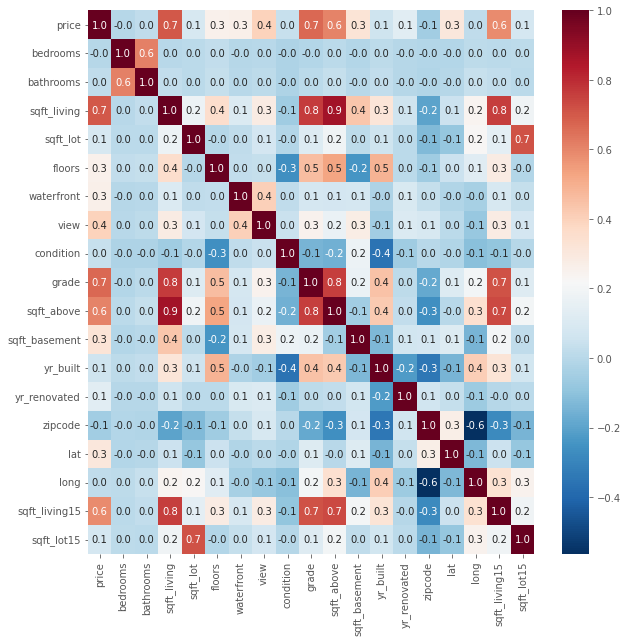

In [128]:
sns.heatmap(data = df[f_col].corr(), annot=True,fmt='.1f', cbar=True,cmap='RdBu_r')
plt.xticks(rotation=90)
plt.show()

In [122]:
rows = int((len(df.columns)/3)+1)
col = 3

In [123]:
print(df.dtypes)

price             float64
bedrooms          float64
bathrooms         float64
sqft_living       float64
sqft_lot          float64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
month               int64
year                int64
grade_binned     category
dtype: object


In [124]:
# numerical_col = df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','']]
numerical_col = df.columns.drop('grade_binned').copy()
numerical_col

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

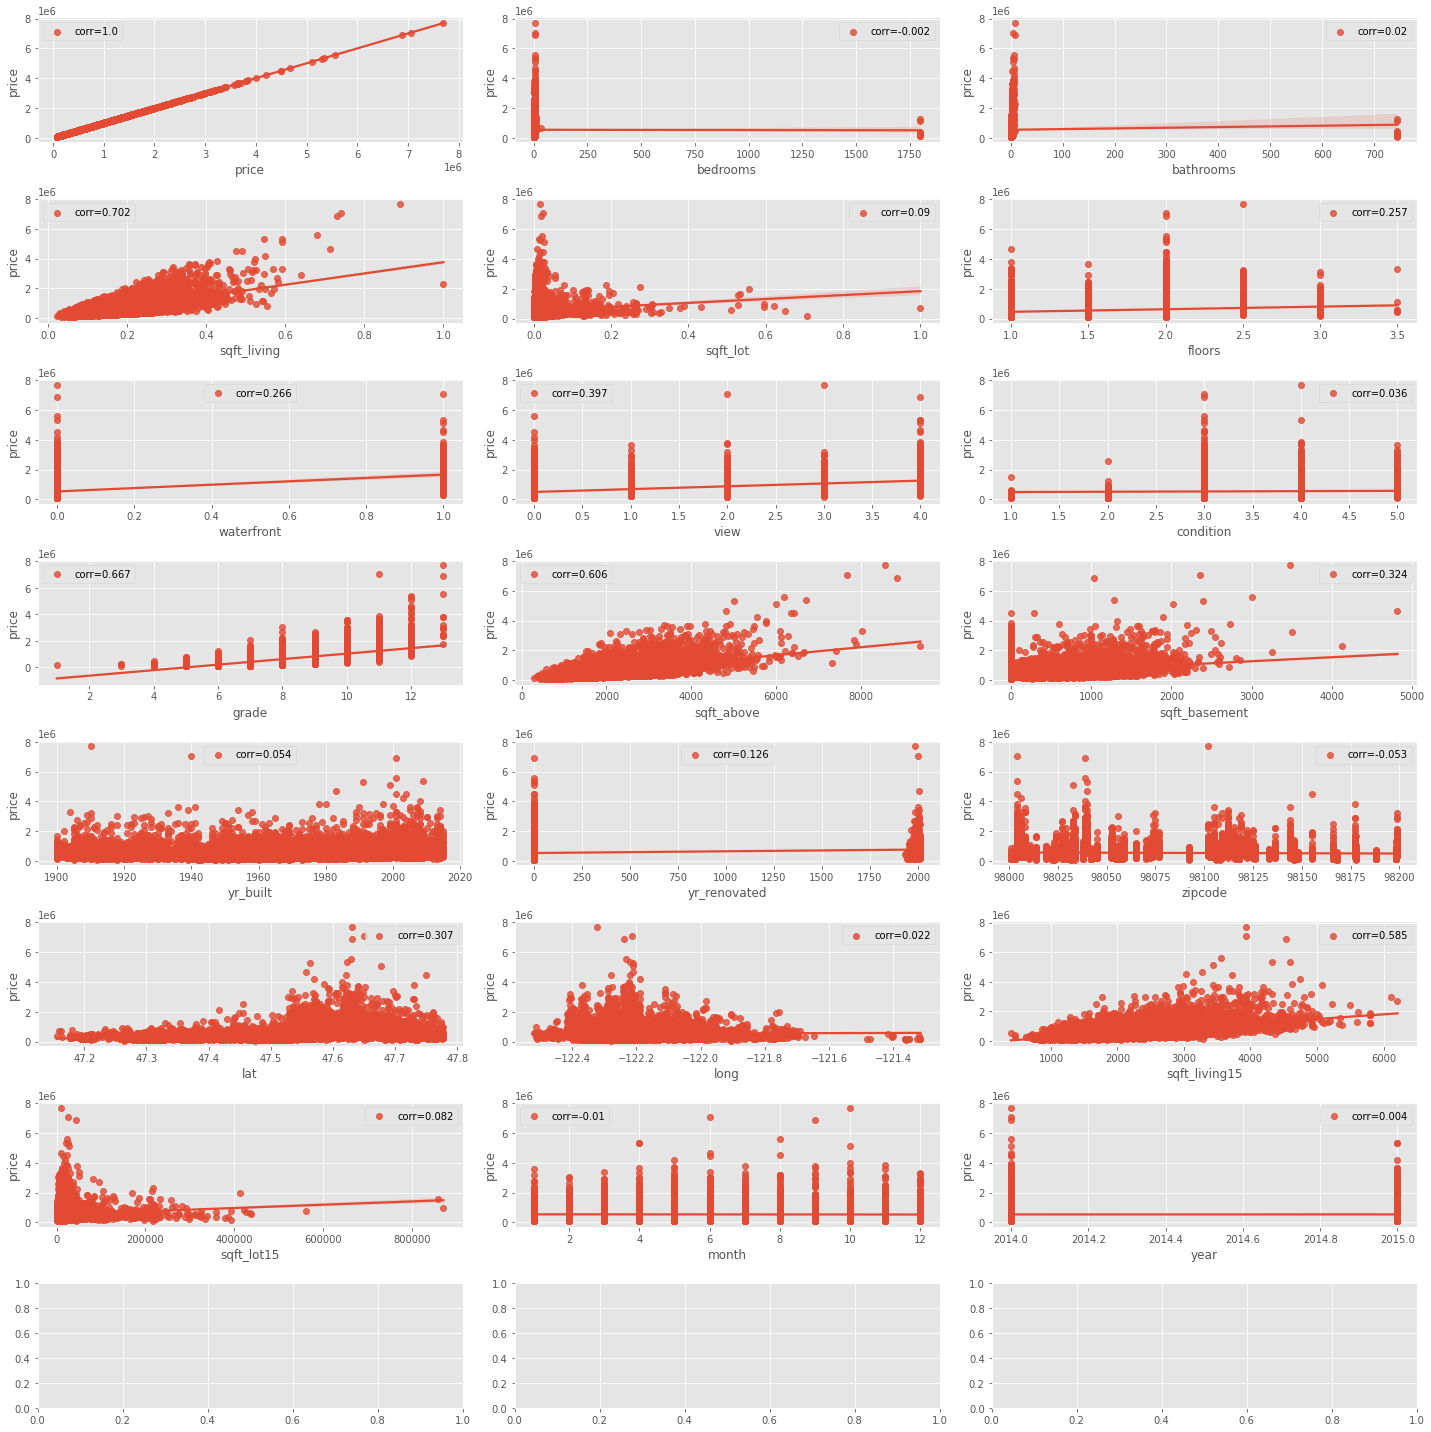

In [125]:
fig, axs = plt.subplots(nrows=rows, ncols=col, figsize=(20,20))
axs = axs.ravel()
for i ,col in enumerate(numerical_col):
    # sns.regplot(x = col, y = 'price',data=df,scatter_kws={'alpha':0.5 , 'color' : 'gray'} , line_kws={'color' : 'red'}, ax=axs[i])
    sns.regplot(x = col, y = 'price',data=df, ax=axs[i])
    corr = df.corr()['price'].sort_values(ascending=True).loc[col].round(3)
    axs[i].legend([f"corr={corr}"])
plt.tight_layout()

<AxesSubplot:xlabel='grade_binned', ylabel='price'>

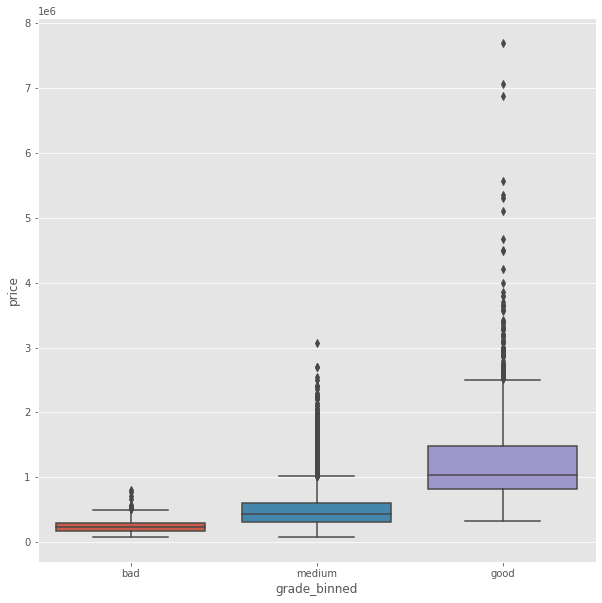

In [126]:
sns.boxplot(data=df, x = 'grade_binned', y = 'price')

<code>Pearson_Coef</code><br>
<ul>
    <li>1: Perfect positive linear corelation.</li>
    <li>0: No linear corelation.</li>
    <li>-1: Perfect negative linear corelation.</li>
</ul>
<br><code> Probability value</code>
<br>
<ul>
    <li>$<$0.001: there is strong evidence that the correlation is significant.</li>
    <li>$<$0.05 there is moderate evidence that the correlation is significant.</li>
    <li>$<$0.1 there is weak evidence that the correlation is significant.</li>
    <li>$>$0.1 there is no evidence that the correlation is significant.</li>
</ul>


In [133]:
from scipy import stats
for i in df.columns:
    pearson_coef, p_value = stats.pearsonr(df[i],df['price']) 
    print(i,":")
    print(f"Pearson_coef = {pearson_coef} and p_value = {p_value}\n")


price :
Pearson_coef = 1.0 and p_value = 0.0

bedrooms :
Pearson_coef = -0.002231830036634122 and p_value = 0.7428430018061682

bathrooms :
Pearson_coef = 0.019891782419941096 and p_value = 0.0034502911399759517

sqft_living :
Pearson_coef = 0.7020350546117997 and p_value = 0.0

sqft_lot :
Pearson_coef = 0.08966086058710017 and p_value = 7.972504510411444e-40

floors :
Pearson_coef = 0.25679388755071697 and p_value = 1.6e-322

waterfront :
Pearson_coef = 0.2663694340306047 and p_value = 0.0

view :
Pearson_coef = 0.39729348829449046 and p_value = 0.0

condition :
Pearson_coef = 0.03636178912899879 and p_value = 8.935654062443092e-08

grade :
Pearson_coef = 0.6674342560202486 and p_value = 0.0

sqft_above :
Pearson_coef = 0.605567298356078 and p_value = 0.0

sqft_basement :
Pearson_coef = 0.3238160207119931 and p_value = 0.0

yr_built :
Pearson_coef = 0.05401153149479318 and p_value = 1.9298728093948343e-15

yr_renovated :
Pearson_coef = 0.12643379344088745 and p_value = 1.0213478858317

TypeError: unsupported operand type(s) for +: 'float' and 'str'

*** 
**Important Variables:<br>**
<ol>
<li>sqft_living</li>
<li>grade</li>
<li>sqft_above </li>
<li>sqft_living15 </li>
</ol>

***

# Model Development

In [201]:
x_data = df.drop(['price','grade_binned'], axis=1)
y_data = df['price']
features = df[['sqft_living','grade','sqft_above','sqft_living15']]

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.20,random_state=1)

In [141]:
# Input = [('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [ ]:
# pipe = Pipeline(Input)
# pipe.fit(x_train,y_train)
# yhat = pipe.predict(x_test)

In [325]:
# ROUGH

pr = PolynomialFeatures(degree=5)
lr = LinearRegression()
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
lr.fit(x_train_pr,y_train)
print(len(lr.predict(x_train_pr)))
print(len(x_train_pr))
yhat = lr.predict(x_test_pr)

17290
17290


array([ 0.00000000e+00,  5.36639336e+06, -4.53617624e+07,  2.43286856e+08,
       -4.67243452e+08,  3.11060495e+08])

C:\Users\Acer\AppData\Local\Temp\ipykernel_15432\427994036.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_train, hist=False,color='r',label='y')
C:\Users\Acer\AppData\Local\Temp\ipykernel_15432\427994036.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(yhat, his

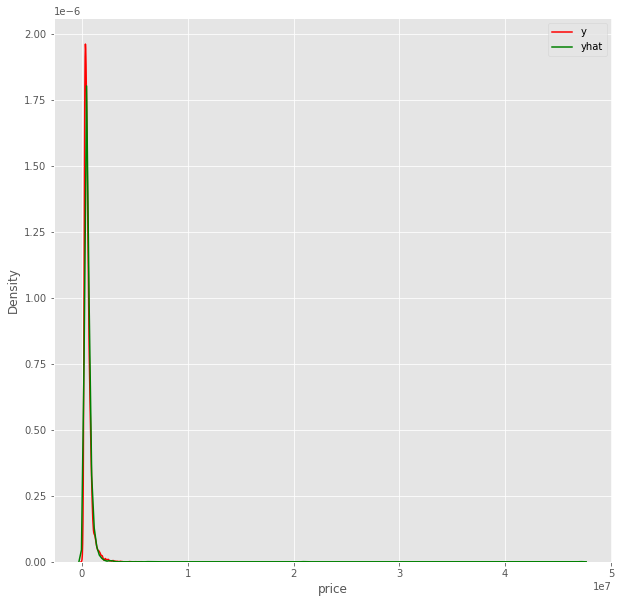

In [322]:
# ROUGH

ax1 = sns.distplot(y_train, hist=False,color='r',label='y')
sns.distplot(yhat, hist=False, color='g',label='yhat', ax=ax1)
plt.legend()
plt.show()

In [292]:
# ROUGH

len(x_train[['sqft_living']])
x_train[['sqft_living']].values
len(x_train)

17290

In [312]:
# ROUGH

xmax = max([x_train['sqft_living'].values.max(),x_test['sqft_living'].values.max()])
xmin = min([x_train['sqft_living'].values.min(),x_test['sqft_living'].values.min()])
x = np.arange(xmin,xmax,0.00006).reshape(-1,1)
x_pr = pr.fit_transform(x)
yhat = lr.predict(x_pr)
# plt.plot(x, yhat,'y-')
# print(x)


In [310]:
def PollyPlot(x_train, x_test, y_train, y_test, lr, pr):
    width=12
    height=10
    plt.figure(figsize=(width,height))

    xmax = max([x_train.values.max(),x_test.values.max()])
    xmin = min([x_train.values.min(),x_test.values.min()])
    x = np.arange(xmin,xmax,0.00006).reshape(-1,1)
    x_pr = pr.fit_transform(x)
    yhat = lr.predict(x_pr)

    plt.plot(x_train,y_train,'ro',label='Training Data')
    plt.plot(x_test,y_test,'go',label='Test Data')
    plt.plot(x, yhat, 'y',label = 'Predicted Data')
    plt.ylabel('Price')
    plt.legend()
    # plt.ylim([-1000000,1000000])


In [274]:
def f(order, test_data,feature):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size= test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[[feature]])
    # x_test_pr = pr.fit_transform(x_test[[feature]])
    lr = LinearRegression()
    lr.fit(x_train_pr,y_train)
    PollyPlot(x_train[[feature]],x_test[[feature]],y_train, y_test,lr,pr)

In [150]:
from ipywidgets import interact

In [311]:
interact(f, order=(0,13,1), test_data=(0.05,0.95,0.05),feature=(features)) 

interactive(children=(IntSlider(value=6, description='order', max=13), FloatSlider(value=0.45, description='te…

<function __main__.f(order, test_data, feature)>

In [366]:
[i for i in range(10)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [371]:
def r2(degree):
    list = []
    order = [i for i in range(degree)]
    for n in order:
        pr = PolynomialFeatures(degree=n)
        x_train_pr = pr.fit_transform(x_train[['sqft_living']])
        x_test_pr = pr.fit_transform(x_test[['sqft_living']])
        lr.fit(x_train_pr, y_train)
        list.append(lr.score(x_test_pr, y_test))
    # score = lr.score(x_test_pr, y_test)
    plt.plot(order, list)
    plt.xlabel('order')
    plt.ylabel('R^2')
    plt.title('R^2 Using Test Data')

In [373]:
interact(r2, degree=(1,21,1))

interactive(children=(IntSlider(value=11, description='degree', max=21, min=1), Output()), _dom_classes=('widg…

<function __main__.r2(degree)>

In [393]:
lis_evaluate = []
def model_prediction(model, model_name):
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    axs = axs.ravel()
    
    # sns.barplot(model.coef_, features.columns, ax=axs[0])
    # axs[0].title.set_text(f"{model_name} Coef")

    sns.histplot(prediction-y_test.values, bins=20, ax =axs[1])
    axs[1].title.set_text(f"{model_name} Loss")

    plt.show()

    r2 = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction).round(2)

    print(f"{model_name} R2 = {r2}")
    print(f"{model_name} MSE = {mse}")
    lis_evaluate.append([model_name, r2, mse])

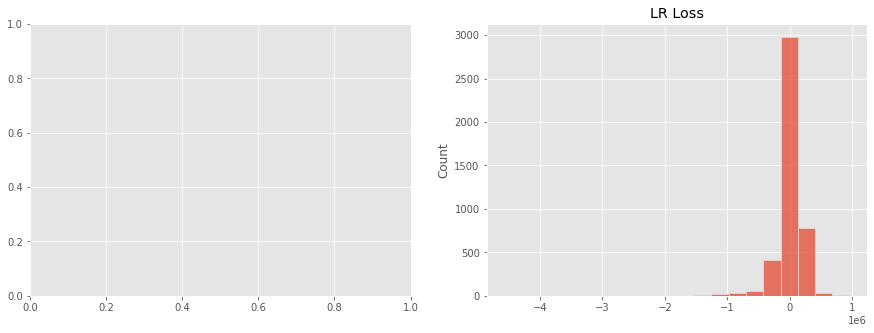

LR R2 = 0.6792127847539893
LR MSE = 55368184857.76


In [394]:
model_prediction(LinearRegression(), 'LR')

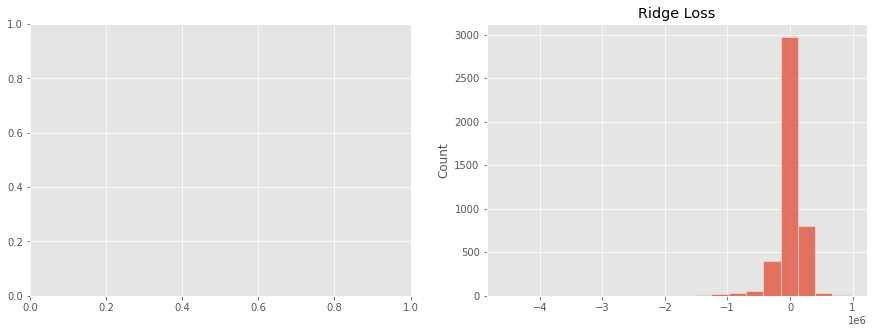

Ridge R2 = 0.6791373982817295
Ridge MSE = 55381196636.08


In [395]:
model_prediction(Ridge(),'Ridge')

c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.233e+14, tolerance: 2.166e+11
  model = cd_fast.enet_coordinate_descent(


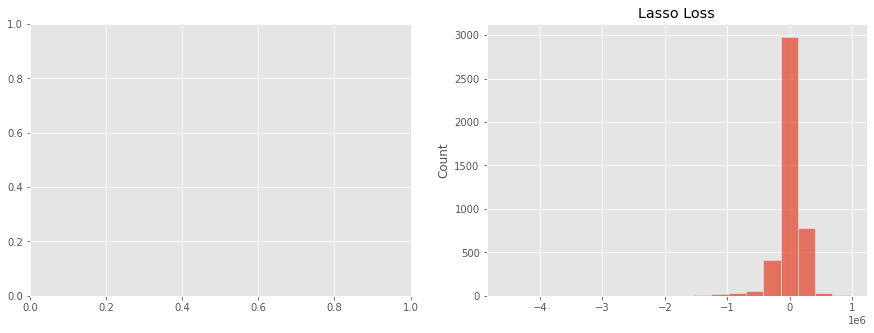

Lasso R2 = 0.6792106418675679
Lasso MSE = 55368554722.04


In [396]:
model_prediction(Lasso(),'Lasso')

In [397]:
result = pd.DataFrame(lis_evaluate, columns=['model', 'R2', 'MSE']).sort_values(by='R2', ascending=False)

In [398]:
result

,model,R2,MSE
0,LR,0.679213,5.536818e+10
2,Lasso,0.679211,5.536855e+10
1,Ridge,0.679137,5.538120e+10


In [423]:
# Calculate train_score and test_score using Ridge Model with all the important features
pr = PolynomialFeatures(degree=4)
x_train_pr = pr.fit_transform(x_train[['sqft_living', 'sqft_living15','grade', 'sqft_above']])
x_test_pr = pr.fit_transform(x_test[['sqft_living', 'sqft_living15','grade','sqft_above']])
# x_train_pr = pr.fit_transform(x_train[['sqft_living', 'sqft_living15','grade']])
# x_test_pr = pr.fit_transform(x_test[['sqft_living', 'sqft_living15','grade']])
ridge = Ridge(alpha=10)
ridge.fit(x_train_pr, y_train)
train_score, test_score = ridge.score(x_train_pr, y_train), ridge.score(x_test_pr,y_test)
print(f"train_score: {train_score}\ntest_score: {test_score}")

train_score: 0.6291625340438791
test_score: 0.43894698723354575


c:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.40879e-32): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


<h3>Ridge Regression</h3>

<code>Without using feature 'sqft_above' the value of </code><br>
**train_score: 0.60**
<br>
**test_score: 0.63**
<br>
<code>With using feature 'sqft_above' the value of </code><br>
**train_score: 0.62**
<br>
**test_score: 0.43**